In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5d97052749c403721dc478d41cd980f1


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | wladyslawowo
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | orocue
Processing Record 4 of Set 1 | kavieng
Processing Record 5 of Set 1 | mareeba
Processing Record 6 of Set 1 | naze
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | dikson
Processing Record 9 of Set 1 | bambous virieux
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | trabzon
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | vila franca do campo
Processing Record 15 of Set 1 | barcelos
Processing Record 16 of Set 1 | klaksvik
Processing Record 17 of Set 1 | narsaq
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | saskylakh
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 | rikitea
Processing Record

Processing Record 42 of Set 4 | georgetown
Processing Record 43 of Set 4 | dudhani
Processing Record 44 of Set 4 | valparaiso
Processing Record 45 of Set 4 | roald
Processing Record 46 of Set 4 | warqla
City not found. Skipping...
Processing Record 47 of Set 4 | homer
Processing Record 48 of Set 4 | fevralsk
City not found. Skipping...
Processing Record 49 of Set 4 | collie
Processing Record 50 of Set 4 | constitucion
Processing Record 1 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 5 | port lincoln
Processing Record 3 of Set 5 | tanshui
City not found. Skipping...
Processing Record 4 of Set 5 | leshukonskoye
Processing Record 5 of Set 5 | markala
Processing Record 6 of Set 5 | chuy
Processing Record 7 of Set 5 | umm kaddadah
Processing Record 8 of Set 5 | mae sot
Processing Record 9 of Set 5 | hamilton
Processing Record 10 of Set 5 | bengkulu
Processing Record 11 of Set 5 | matagami
Processing Record 12 of Set 5 | college
Processing Record 13 of Set 5 

Processing Record 30 of Set 8 | lorengau
Processing Record 31 of Set 8 | besancon
Processing Record 32 of Set 8 | mahibadhoo
Processing Record 33 of Set 8 | teguise
Processing Record 34 of Set 8 | kiryas joel
Processing Record 35 of Set 8 | pakhtakoron
Processing Record 36 of Set 8 | fereydun kenar
Processing Record 37 of Set 8 | komsomolskiy
Processing Record 38 of Set 8 | montanhas
Processing Record 39 of Set 8 | katherine
Processing Record 40 of Set 8 | tarko-sale
Processing Record 41 of Set 8 | matamoros
Processing Record 42 of Set 8 | champerico
Processing Record 43 of Set 8 | dubbo
Processing Record 44 of Set 8 | cidreira
Processing Record 45 of Set 8 | ystad
Processing Record 46 of Set 8 | ulaangom
Processing Record 47 of Set 8 | maues
Processing Record 48 of Set 8 | carikar
City not found. Skipping...
Processing Record 49 of Set 8 | malindi
Processing Record 50 of Set 8 | kayerkan
Processing Record 1 of Set 9 | kutum
Processing Record 2 of Set 9 | ahuimanu
Processing Record 3 o

Processing Record 16 of Set 12 | edwardsville
Processing Record 17 of Set 12 | kahului
Processing Record 18 of Set 12 | reconquista
Processing Record 19 of Set 12 | saint-joseph
Processing Record 20 of Set 12 | jalu
Processing Record 21 of Set 12 | presque isle
Processing Record 22 of Set 12 | almaznyy
Processing Record 23 of Set 12 | bjornevatn
Processing Record 24 of Set 12 | humberto de campos
Processing Record 25 of Set 12 | minden
Processing Record 26 of Set 12 | tawnat
City not found. Skipping...
Processing Record 27 of Set 12 | george
Processing Record 28 of Set 12 | matucana
Processing Record 29 of Set 12 | marsh harbour
Processing Record 30 of Set 12 | makakilo city
Processing Record 31 of Set 12 | pizhanka
Processing Record 32 of Set 12 | keningau
Processing Record 33 of Set 12 | colares
Processing Record 34 of Set 12 | shibganj
Processing Record 35 of Set 12 | belomorsk
Processing Record 36 of Set 12 | maseru
Processing Record 37 of Set 12 | japura
Processing Record 38 of Se

In [9]:
len(city_data)

564

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Wladyslawowo,54.7909,18.4009,58.55,75,95,15.10,PL,2022-09-14 18:18:52
1,Avarua,-21.2078,-159.7750,75.25,78,40,13.80,CK,2022-09-14 18:18:52
2,Orocue,4.7912,-71.3354,90.68,52,29,6.20,CO,2022-09-14 18:18:52
3,Kavieng,-2.5744,150.7967,81.70,74,48,16.40,PG,2022-09-14 18:18:53
4,Mareeba,-17.0000,145.4333,66.92,96,62,3.00,AU,2022-09-14 18:18:53
5,Naze,28.3667,129.4833,81.52,84,45,18.61,JP,2022-09-14 18:18:53
6,Castro,-24.7911,-50.0119,57.76,94,100,3.58,BR,2022-09-14 18:18:53
7,Dikson,73.5069,80.5464,38.17,74,51,8.57,RU,2022-09-14 18:18:54
8,Bambous Virieux,-20.3428,57.7575,71.85,68,40,8.05,MU,2022-09-14 18:18:54
9,Ushuaia,-54.8000,-68.3000,46.06,36,20,10.36,AR,2022-09-14 18:18:54


In [11]:
new_column_order = ["City",'Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']

In [12]:
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Wladyslawowo,PL,2022-09-14 18:18:52,54.7909,18.4009,58.55,75,95,15.10
1,Avarua,CK,2022-09-14 18:18:52,-21.2078,-159.7750,75.25,78,40,13.80
2,Orocue,CO,2022-09-14 18:18:52,4.7912,-71.3354,90.68,52,29,6.20
3,Kavieng,PG,2022-09-14 18:18:53,-2.5744,150.7967,81.70,74,48,16.40
4,Mareeba,AU,2022-09-14 18:18:53,-17.0000,145.4333,66.92,96,62,3.00
...,...,...,...,...,...,...,...,...,...
559,Changying,CN,2022-09-14 18:21:46,52.8733,123.3213,47.28,96,100,3.11
560,Mandalgovi,MN,2022-09-14 18:21:46,45.7625,106.2708,63.07,41,79,8.46
561,Bridlington,GB,2022-09-14 18:21:46,54.0831,-0.1919,60.89,77,11,12.03
562,Novikovo,RU,2022-09-14 18:21:47,51.1537,37.8879,49.42,95,100,6.17


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

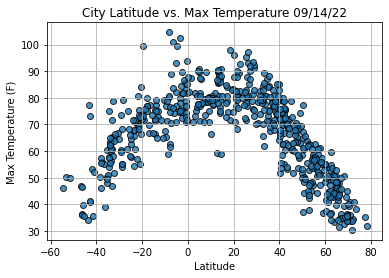

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

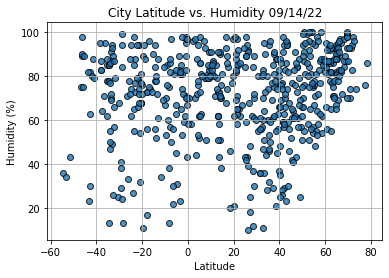

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

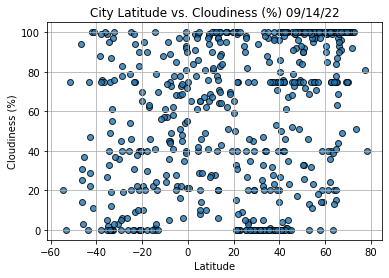

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

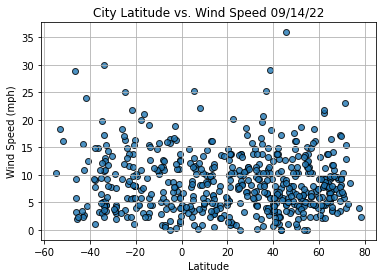

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
index13 = city_data_df.loc[13]
index13

City          Vila Franca Do Campo
Country                         PT
Date           2022-09-14 18:14:51
Lat                        37.7167
Lng                       -25.4333
Max Temp                     81.19
Humidity                        81
Cloudiness                      23
Wind Speed                   11.16
Name: 13, dtype: object

In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

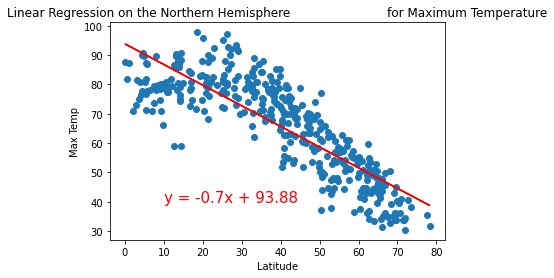

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

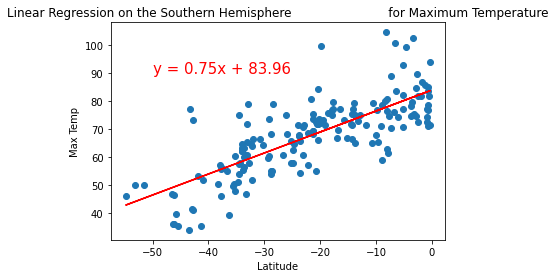

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

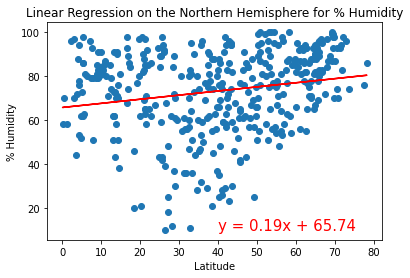

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

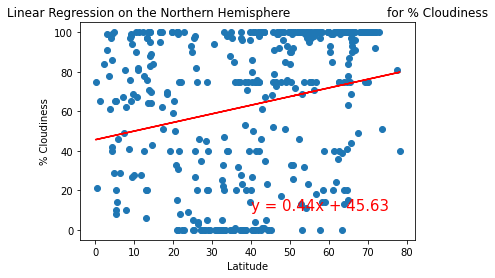

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

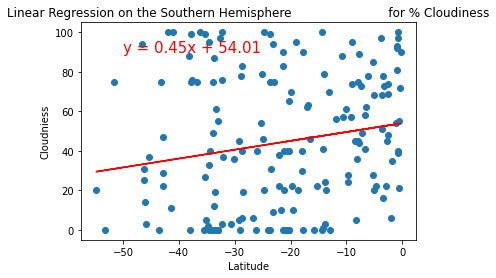

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', 'Cloudniess',(-50,90))

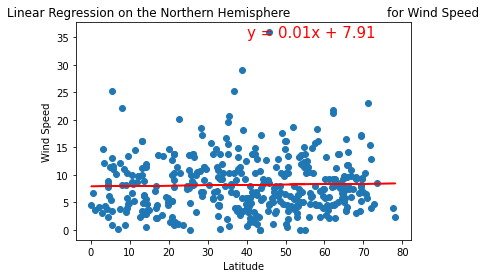

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

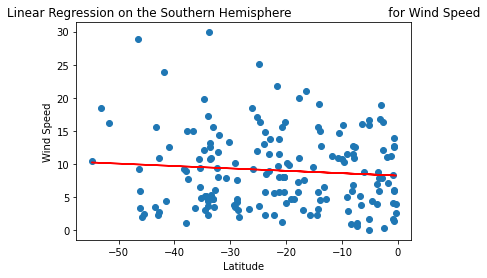

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))